In [ ]:
# 1- Download the "CAMRI Mouse Brain MRI Data" dataset at:
# https://openneuro.org/datasets/ds002868/versions/1.0.1
# make the following structure:
# > dataset/
#     > rawdata/
#         > sub-001/
#             > ses-001/
#             ...

# 2-a (Optional but recommended) you can check the documentation 
# of nibabel to open nifti files at https://nipy.org/nibabel/gettingstarted.html

# 2-b (Just optional... if you got guts) check the actual nifti header
# specification at https://nifti.nimh.nih.gov/pub/dist/src/niftilib/nifti1.h

# 3 (Just for fun) you can check the BIDS directives which defines your dataset
# structure and metadata: https://bids.neuroimaging.io/

In [3]:
import os
import numpy as np

import nibabel as nib

import matplotlib.pyplot as plt

from pathlib import Path

In [9]:
root_path = Path("/Users/vigji/code/python-cimec/practicals/data/imaging_data")

In [10]:
# Scroll through your dataset

# use Path class rglob method to check how many sessions you have ?
# save your session paths in a sessions list

sessions = [str(p) for p in root_path.rglob(f"ses-*/")]
print(f"There are {len(sessions)} individual sessions")

There are 32 individual sessions


In [11]:
# Check the number of sessions labeled ses-1

sessions = [str(p) for p in root_path.rglob(f"ses-1*/")]
print(f"There are {len(sessions)} individual sessions 1")

There are 16 individual sessions 1


In [12]:
# use split and numpy unique function to indentify the number of subjects you have

subjects = np.unique([x.split(os.sep)[-2] for x in sessions])
print(f"There are {len(subjects)} individual subjects")

There are 16 individual subjects


In [13]:
# use split and numpy unique function to indentify the number of acquisition types
# you have it is defined by the acq- entity in the nifti file name in penultian position

files = [str(p) for p in root_path.rglob(f"*.nii.gz")]

acquisitions = np.unique([x.split(os.sep)[-1].split('_')[-2] for x in files])
print(f"There are {len(acquisitions)} acquisition types")
acquisitions

There are 2 acquisition types


array(['acq-EPI', 'acq-RARE'], dtype='<U8')

In [14]:
# open a single file with nibabel

subject_id = '002'
session_id = '1'

file = [str(p) for p in root_path.rglob(f"sub-{subject_id}*ses-{session_id}*.nii.gz")][0]

img = nib.load(file)

In [22]:
type(img)

nibabel.nifti1.Nifti1Image

In [21]:
# Check the header of your images with the header class

for x in img.header:
    
    print(f"{x:<18} : {img.header[x]}")

sizeof_hdr         : 348
data_type          : b''
db_name            : b''
extents            : 0
session_error      : 0
regular            : b'r'
dim_info           : 0
dim                : [  3 120 120  48   1   1   1   1]
intent_p1          : 0.0
intent_p2          : 0.0
intent_p3          : 0.0
intent_code        : 0
datatype           : 4
bitpix             : 16
slice_start        : 0
pixdim             : [1.   0.16 0.16 0.16 0.   0.   0.   0.  ]
vox_offset         : 0.0
scl_slope          : nan
scl_inter          : nan
slice_end          : 0
slice_code         : 0
xyzt_units         : 2
cal_max            : 0.0
cal_min            : 0.0
slice_duration     : 0.0
toffset            : 0.0
glmax              : 0
glmin              : 0
descrip            : b''
aux_file           : b''
qform_code         : 1
sform_code         : 1
quatern_b          : 1.0
quatern_c          : -0.0
quatern_d          : 0.0
qoffset_x          : -9.600000381469727
qoffset_y          : 9.419278144836426
qof

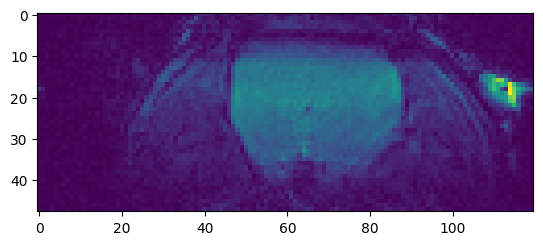

In [33]:
plt.figure()
plt.imshow(data[:, 35, :].T)

In [26]:
data = img.get_fdata()

(-0.5, 119.5, 47.5, -0.5)

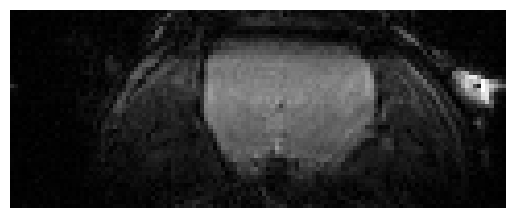

In [23]:
# extract data to display with get_fdata method
# data must be flipped along the third dimension (you can use numpy flip function)
# Display one coronal slice


slice_id = 35
slice_to_display = np.flip(img.get_fdata(),2)[:,slice_id,:]

plt.imshow(np.rot90(slice_to_display), cmap = 'Greys_r')
plt.axis('off')

(-0.5, 119.5, 119.5, -0.5)

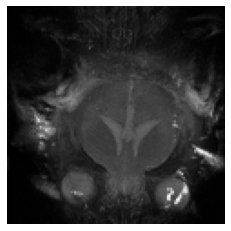

In [146]:
# Display the maximal intensity projection of the horizontal slice

max_intensity = np.flip(img.get_fdata(),2).max(2)

plt.imshow(np.rot90(max_intensity), cmap = 'Greys_r')
plt.axis('off')

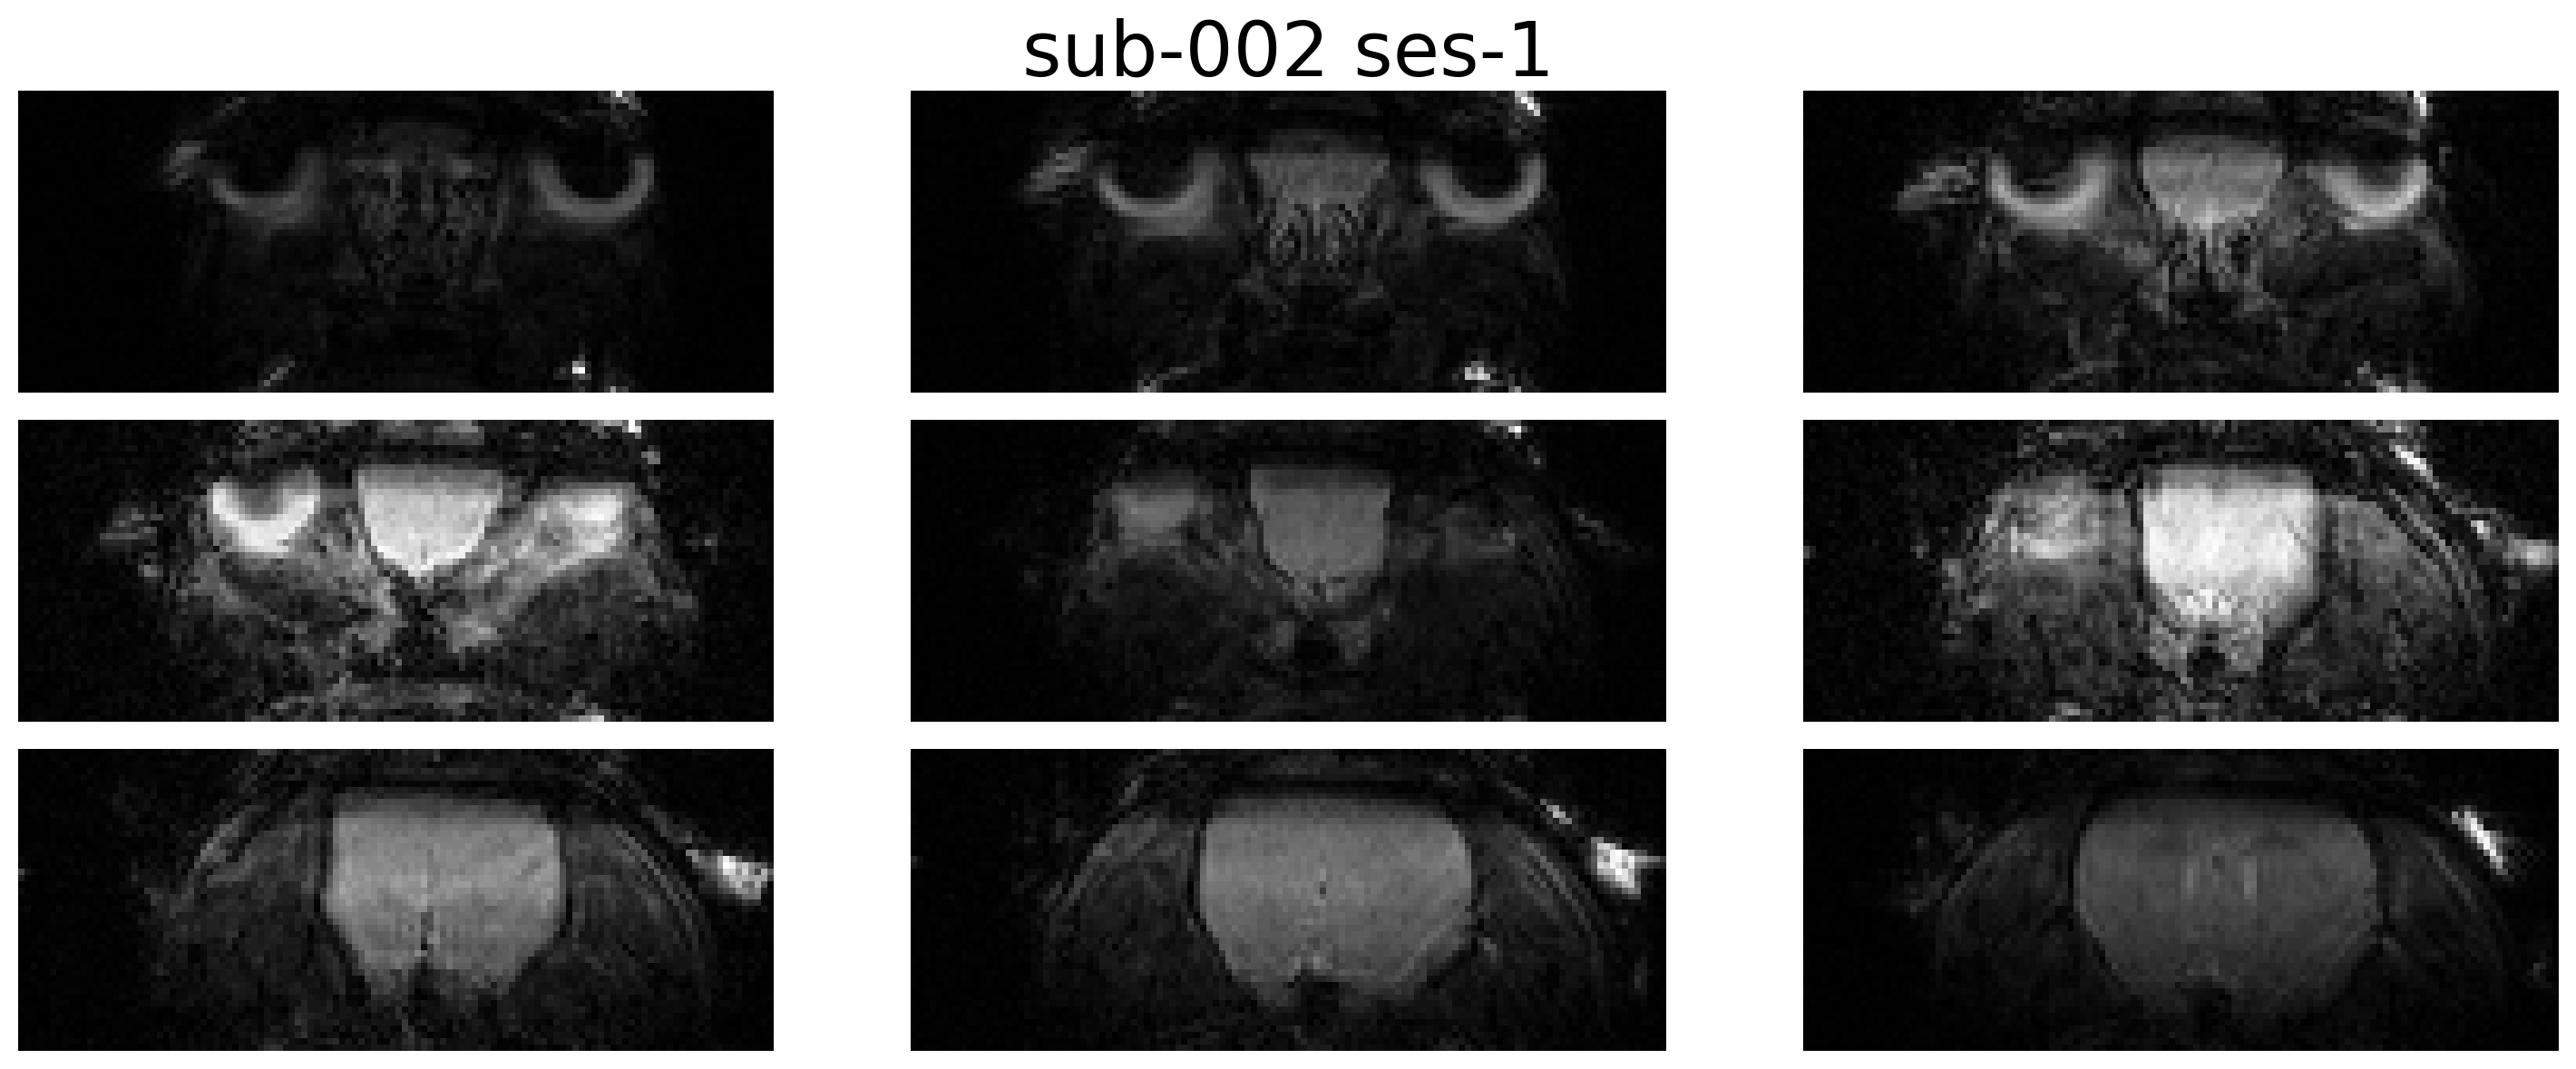

In [143]:
# define a function to display anatomical slices as mosaics

def display_coronal_slices(img, ax, nbLin = 3, nbCol = 3, slice_min = 15, slice_max = 39, title = 'title'):

    slice_ids = np.linspace(slice_min, slice_max, nbLin*nbCol).astype(int)

    for i,slice_id in enumerate(slice_ids):

        slice_to_display = np.flip(img.get_fdata(),2)[:,slice_id,:]
        ax[i//nbCol,i%nbCol].imshow(np.rot90(slice_to_display), cmap = 'Greys_r')
        ax[i//nbCol,i%nbCol].axis('off')

        if i == nbCol//2:
            ax[i//nbCol,i%nbCol].set_title(title, fontsize = 30)
            
        
    plt.tight_layout()
    
    return

fig, ax = plt.subplots(nbLin, nbCol, figsize = (nbCol*5,nbLin*2), dpi = 200)
display_coronal_slices(img, ax, nbLin = 3, nbCol = 3, title = f'sub-{subject_id} ses-{session_id}')  

In [139]:
# Create a new 'derivatives' folder in your root directory
# And a 'visualisation' folder in it

# > dataset/
#     > rawdata/
#         > sub-001/
#             > ses-001/
#             ...
#     > derivatives/
#         > visualisation/

save_directory = os.path.join(str(root_path.parent),'derivatives','visualisation')
os.makedirs(save_directory, exist_ok = True)

In [161]:
# create one 'RARE' and one 'EPI' folder to populate with coronal mosaics
# bonus: export as a BIDS structure

# > dataset/
#     > rawdata/
#         > sub-001/
#             > ses-001/
#             ...
#     > derivatives/
#         > visualisation/
#             > EPI/
#                 > sub-001/
#                     > ses-001/
#                         > sub-001_ses-001_acq-EPI_mosaic.png
#             > RARE/
#                 > sub-001/
#                     > ses-001/
#                         > sub-001_ses-001_acq-RARE_mosaic.png

# Recommendation use tqdm to have fancy progress bars

files = [str(p) for p in root_path.rglob(f"*.nii.gz")]

for file in tqdm(files):
    
    subject_id = file.split(os.sep)[-1].split('_')[0].split('sub-')[-1]
    session_id = file.split(os.sep)[-1].split('_')[1].split('ses-')[-1]
    acquisition_id = file.split(os.sep)[-1].split('_')[2].split('acq-')[-1]
    
    img = nib.load(file)
    
    fig, ax = plt.subplots(nbLin, nbCol, figsize = (nbCol*5,nbLin*2), dpi = 200)
    display_coronal_slices(
        img, 
        ax, 
        nbLin = 3, 
        nbCol = 3, 
        title = f'sub-{subject_id} ses-{session_id} acq-{acquisition_id}'
    ) 
    
    save_folder = os.path.join(
        save_directory, 
        acquisition_id,
        f'sub-{subject_id}', 
        f'ses-{session_id}'
    )
    
    os.makedirs(save_folder, exist_ok = True)
    
    save_name = os.path.join(
        save_folder,
        f'sub-{subject_id}_ses-{session_id}_acq-{acquisition_id}_mosaic.png'
    )
    
    plt.savefig(save_name)
    plt.close('all')

100%|███████████████████████████████████████████| 32/32 [00:14<00:00,  2.28it/s]
